# Visualizações com seaborn

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Nessa parte, nosso interesse é trabalhar na escolha das melhores visualizações para nossos dados, e como implementar isso usando a biblioteca seaborn.

**Por que isso é importante?** Além de realizar análises de dados, precisamos nos preparar para comunicar resultados. Boas visualizações são essenciais para isso. A necessidade de comunicar dados pode acontecer dentro do dos seus estudos de direito, mas também em situações de negócios, como apresentações para clientes e *visual law*.

### O que é?

Visualização de dados é a **representação de dados** em gráficos, tabelas e diagramas que podem ser interpretados por pessoas. Trata-se de uma área interdisciplinar, misturando estatística, arte e comunicação. É uma parte da área de data *storytelling*, que envolve organizar todos os resultados de uma análise de dados em uma ordem lógica para comunicar de forma efetiva com a audiência.

### Por que fazer?

Visualizações estão presentes na grande maioria dos projetos de ciência de dados. Além disso, é a parte mais acessível da ciência de dados do ponto de vista **de quem lê**. Mostrar uma visualização costuma ser mais efetivo do que a saída de um modelo ou uma fórmula. Finalmente, é uma das partes mais difíceis de automatizar da ciência de dados. Uma carreira em *dataviz* dificilmente ficará obsoleta.

### Para que servem?

Uma base de dados contém toda a informação que precisamos. No entanto, não somos capazes de tirar conclusões apenas olhando essas bases. Por isso, é necessário resumir esses dados em **estatísticas**, como vimos na apostila sobre medidas de posição e variabilidade. Nem sempre as estatísticas (os números) são úteis para uma comunicação efetiva... Por isso, faz sentido mostrá-las usando formas, cores e outros elementos que facilitam a absorção da informação pelas pessoas.

### Em que momento utilizamos?

Abaixo, temos o ciclo da ciência de dados. Esse diagrama foi adaptado do livro [R para ciência de dados](https://r4ds.had.co.nz/), que é uma referência para quem quer aprender ciência de dados com R. 

Esse ciclo resume a maioria das tarefas que precisamos executar ao longo de um projeto de ciência de dados. Começamos pela importação, que envolve a leitura de dados de diferentes fontes. Em seguida, limpamos e transformamos esses dados para que possam ser usados em análises. A etapa de análise é um ciclo em si, envolvendo transformação de dados (criação de colunas e agregações), a visualização dos dados e a aplicação de modelos estatísticos / de *machine learning* para entender os dados. Finalmente, precisamos comunicar os resultados ou automatizar nosso produto de dados.

![](https://curso-r.github.io/main-visualizacao/slides/img/ciclo-ciencia-de-dados-vis.png)

Note que a visualização de dados aparece em duas partes principais: *Visualizar* e *Comunicar*. 

Na parte de visualização, estamos fazendo uma **análise exploratória** dos dados. Isso significa que estamos tentando entender os dados, e não necessariamente comunicar resultados. É um trabalho de investigação, que precisa ser rápido de fazer. O objetivo principal é aprender.

Na parte de comunicação, estamos fazendo um trabalho de **otimização visual**. Agora, nosso objetivo é comunicar os resultados com outras pessoas. Isso significa que precisamos de gráficos mais bonitos, mais explicativos e mais fáceis de entender. O trabalho deve, inclusive, ser encaixado em um fluxo de *storytelling*. O objetivo principal é comunicar.

O `seaborn` é uma biblioteca que é muito efetiva para fazer gráficos de análise exploratória. Para otimização visual, ela é um pouco limitada. No entanto, é possível fazer gráficos muito bonitos com ela, e é uma biblioteca muito fácil de usar. Por isso, é uma ótima escolha para começar a aprender visualização de dados. Se tiver interesse em estudar uma ferramenta mais robusta, recomendamos o `ggplot2` do R, que é uma das melhores ferramentas para otimização visual.

A partir de agora, vamos retomar os nossos conceitos de tipos de variáveis e descrever as melhores visualizações para cada combinação de tipos de variáveis.

Uma referência legal nesse sentido é o site [From Data to Viz](https://www.data-to-viz.com/), que é um guia para escolher a melhor visualização para os seus dados.

![](https://curso-r.github.io/main-visualizacao/slides/img/data-to-viz.png)

Vamos tratar dos seguintes exemplos:

1. Visualizações para variáveis categóricas
  - Gráficos univariados
  - Gráficos bivariados
    - Com outra categórica
    - Com variável numérica

2. Visualizações para variáveis numéricas
  - Gráficos univariados
  - Gráficos bivariados
    - Com variável categórica
    - Com outra numérica

Primeiro vamos falar de exploração, depois vamos dar um exemplo de otimização visual.

## Visualizações para variáveis categóricas

Os gráficos univariados de variáveis categóricas são os mais comuns em ciência de dados no direito, já que o tipo de variável mais comum é a categórica.

### Univariada

A função mais comum para visualizar variáveis categóricas é o `countplot`. Esse gráfico é uma versão do `barplot` do `matplotlib`, mas com a contagem de cada categoria no eixo y.

<Axes: xlabel='decisao', ylabel='count'>

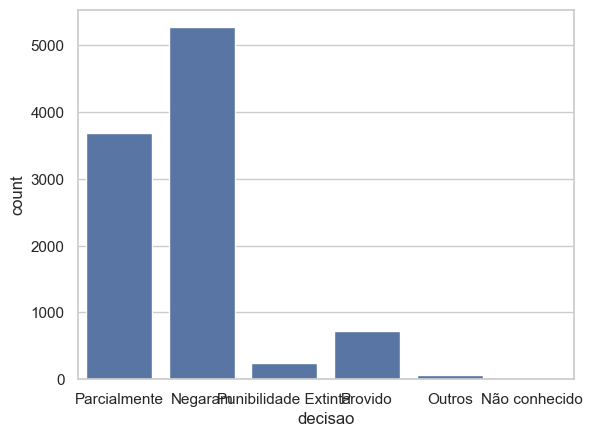

In [103]:
sns.countplot(data=camaras, x='decisao')

Veja que os rótulos ficaram sobrepostos. Outra forma de visualizar é rotacionando o eixo:

<Axes: xlabel='count', ylabel='decisao'>

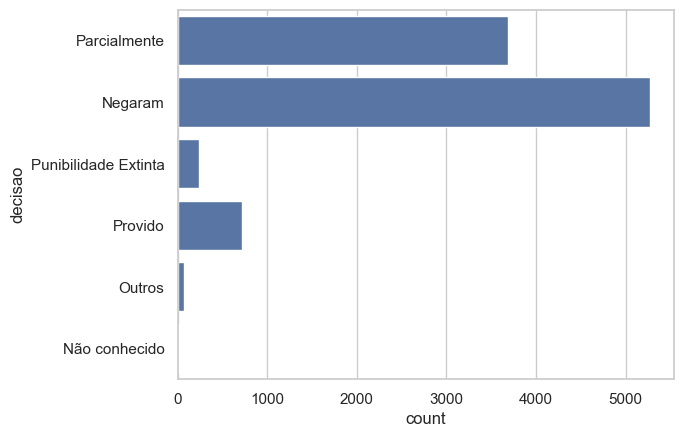

In [104]:
sns.countplot(data=camaras, y='decisao')

Agora está um pouco melhor. Em alguns lugares, existe uma distinção entre 'gráficos de barras' (o segundo caso) e 'gráficos de colunas' (o primeiro caso), mas essa distinção não é importante.

Se nosso interesse é mostrar a proporção e não os valores absolutos, podemos usar o `barplot` do `seaborn`:

Também podemos ordenar as barras para facilitar a leitura. Geralmente fazemos isso apenas para nominais, não para ordinais.

<Axes: xlabel='count', ylabel='decisao'>

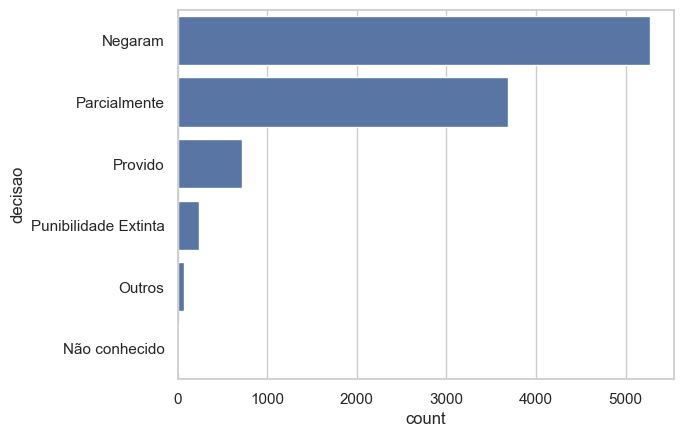

In [105]:
sns.countplot(data=camaras, y='decisao', order=camaras['decisao'].value_counts().index)

E se quisermos mostrar a proporção em vez da contagem? Podemos calcular essas proporções com o pandas e usar o `barplot`. Nesse caso, eu não precisei nem ordenar, porque os dados já estão ordenados do jeito que eu quero.

<Axes: xlabel='prop', ylabel='decisao'>

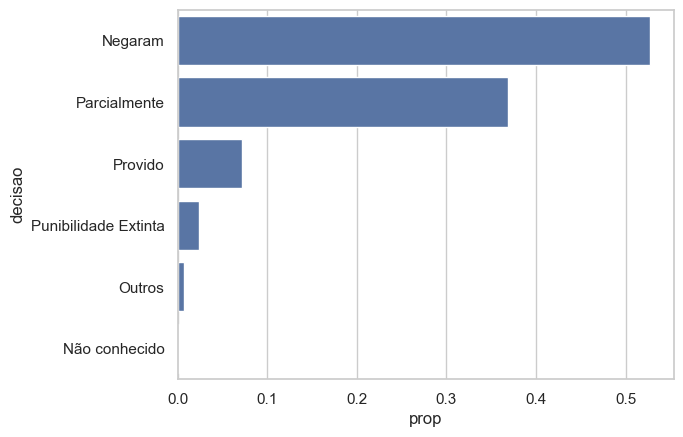

In [106]:
contagens = camaras.value_counts('decisao').reset_index()

contagens['prop'] = contagens['count'] / contagens['count'].sum()

sns.barplot(data=contagens, y='decisao', x='prop')

Na verdade, tanto o `countplot` quanto o `barplot` são versões do `catplot` com `kind='count'` e `kind='bar'`, respectivamente. O `catplot` é uma função mais flexível, que permite que façamos gráficos de barras com mais de uma variável categórica.

Veja a imagem abaixo retirada da documentação do seaborn:

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)


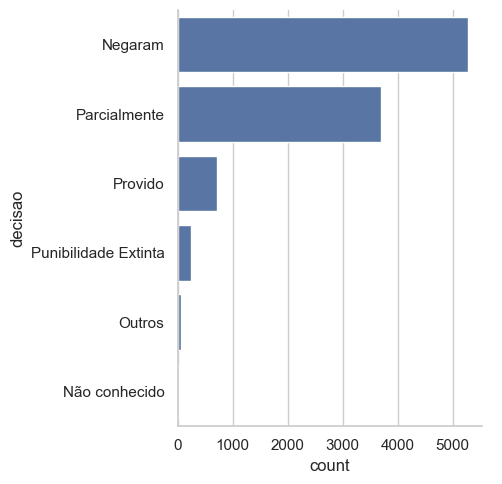

In [107]:
sns.catplot(data=camaras, y='decisao', kind='count', order=camaras['decisao'].value_counts().index)

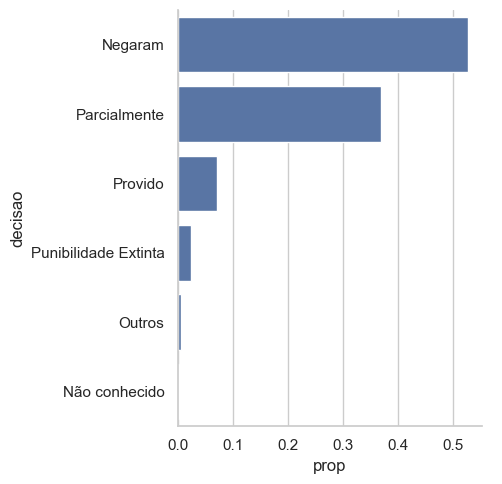

In [108]:
sns.catplot(data=contagens, y='decisao', x = 'prop', kind='bar')

Como o `catplot` é mais flexível, ele é a função que vamos usar para fazer gráficos bivariados com variáveis categóricas.

Por último, temos os gráficos de pizza ou donut. Eles podem ser úteis para mostrar proporções, mas são menos efetivos do que os gráficos de barras. A razão é que é mais difícil comparar setores/ângulos do que comprimentos. No entanto, eles são muito populares em apresentações de negócios. No seaborn, não temos uma função específica para fazer gráficos de pizza, mas podemos usar o `pie` do matplotlib.

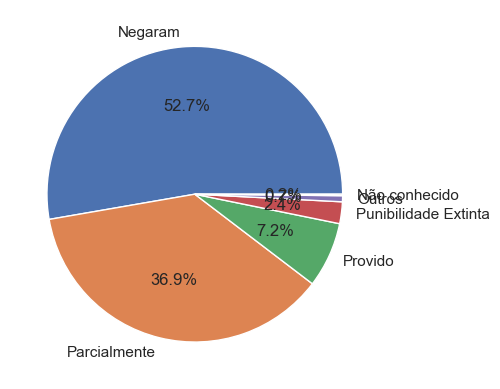

In [109]:
plt.pie(contagens['prop'], labels=contagens['decisao'], autopct='%1.1f%%')
plt.show()

### Bivariada: explicativa categórica

Quando temos duas variáveis categóricas, temos várias escolhas de visualizações possíveis para os gráficos de barras. Os mais comuns são i) separar por cores e colocar as barras lado a lado; ii) separar por cores e empilhar as barras; e iii) criar sub-gráficos para cada categoria.

**Barras lado a lado**

In [110]:
ct_mag = (
  camaras
  .query('polo_mp == "Passivo"')
  .value_counts(['rel_tipo_magistrado', 'decisao'])
  .reset_index()
)

ct_mag['prop'] = ct_mag['count'] / ct_mag.groupby('rel_tipo_magistrado')['count'].transform('sum')

ct_mag

,rel_tipo_magistrado,decisao,count,prop
0,desembargador,Negaram,4259,0.533041
1,desembargador,Parcialmente,3098,0.387735
2,juiz substituto 2º grau,Negaram,656,0.547123
3,juiz substituto 2º grau,Parcialmente,445,0.371143
4,desembargador,Provido,370,0.046308
5,desembargador,Punibilidade Extinta,205,0.025657
6,juiz substituto 2º grau,Provido,58,0.048374
7,desembargador,Outros,45,0.005632
8,juiz substituto 2º grau,Punibilidade Extinta,28,0.023353
9,desembargador,Não conhecido,13,0.001627


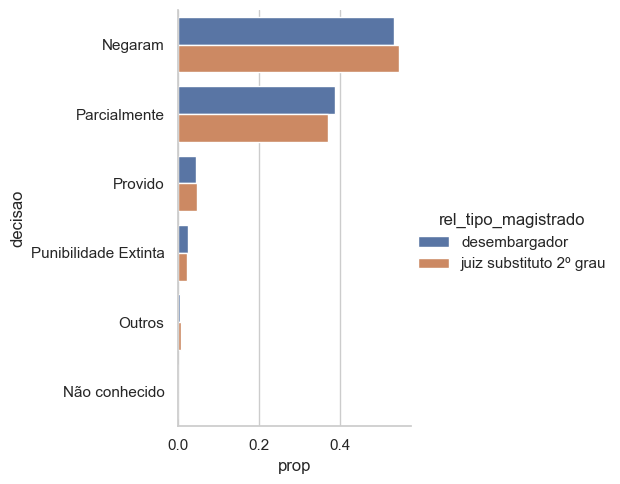

In [111]:
sns.catplot(ct_mag, x = 'prop', y = 'decisao', kind = 'bar', hue = 'rel_tipo_magistrado')

**Barras empilhadas**

In [112]:
camaras['extraord'] = camaras['camara'].str.contains('Extra')

ct_cam = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('extraord == False')
  .value_counts(['camara', 'unanimidade'])
  .reset_index()
)

ct_cam['prop'] = ct_cam['count'] / ct_cam.groupby('camara')['count'].transform('sum')

ct_cam.head(10)

,camara,unanimidade,count,prop
0,06ª Câmara de Direito Criminal,Unânime,661,0.995482
1,08ª Câmara de Direito Criminal,Unânime,621,0.977953
2,07ª Câmara de Direito Criminal,Unânime,587,0.979967
3,16ª Câmara de Direito Criminal,Unânime,579,0.983022
4,13ª Câmara de Direito Criminal,Unânime,575,0.984589
5,14ª Câmara de Direito Criminal,Unânime,567,0.986087
6,09ª Câmara de Direito Criminal,Unânime,551,0.985689
7,15ª Câmara de Direito Criminal,Unânime,538,0.952212
8,11ª Câmara de Direito Criminal,Unânime,531,0.960217
9,04ª Câmara de Direito Criminal,Unânime,525,0.983146


O seaborn não possui uma forma fácil de fazer as barras empilhadas. Por isso, utilizamos o matplotlib mesmo. Para isso, no entanto, precisamos montar uma base pivotada.

In [113]:
pivot_df = ct_cam.pivot(index='camara', columns='unanimidade', values='prop')

pivot_df

unanimidade,Maioria,Sem informação,Unânime
camara,,,
01ª Câmara de Direito Criminal,0.007782,0.001946,0.990272
02ª Câmara de Direito Criminal,0.072464,0.004141,0.923395
03ª Câmara de Direito Criminal,0.005682,0.007576,0.986742
04ª Câmara de Direito Criminal,0.016854,NaN,0.983146
05ª Câmara de Direito Criminal,0.007143,0.007143,0.985714
06ª Câmara de Direito Criminal,NaN,0.004518,0.995482
07ª Câmara de Direito Criminal,0.006678,0.013356,0.979967
08ª Câmara de Direito Criminal,0.017323,0.004724,0.977953
09ª Câmara de Direito Criminal,0.008945,0.005367,0.985689


<Axes: ylabel='camara'>

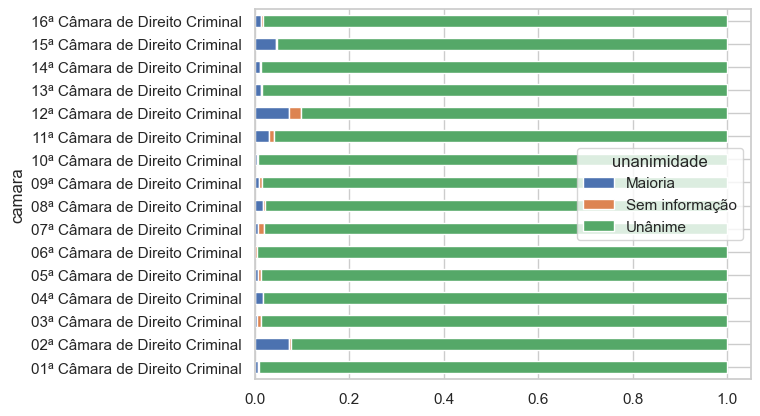

In [114]:
pivot_df.plot(kind='barh', stacked=True)

**Sub-gráficos (facets)**

Para facer sub-gráficos com o seaborn, utilizamos o parâmetro `col=`

In [115]:
comarcas = ['SAO PAULO', 'SAO JOSE DOS CAMPOS', 'SANTOS', 'CAMPINAS']

ct_comarca = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('comarca in @comarcas')
  .value_counts(['comarca', 'decisao'])
  .reset_index()
)

ct_comarca['prop'] = ct_comarca['count'] / ct_comarca.groupby('comarca')['count'].transform('sum')

ct_comarca


,comarca,decisao,count,prop
0,SAO PAULO,Negaram,1061,0.579465
1,SAO PAULO,Parcialmente,657,0.358820
2,CAMPINAS,Negaram,127,0.566964
3,CAMPINAS,Parcialmente,79,0.352679
4,SAO JOSE DOS CAMPOS,Negaram,70,0.588235
5,SAO PAULO,Provido,69,0.037684
6,SANTOS,Negaram,63,0.636364
7,SAO JOSE DOS CAMPOS,Parcialmente,42,0.352941
8,SAO PAULO,Punibilidade Extinta,36,0.019661
9,SANTOS,Parcialmente,30,0.303030


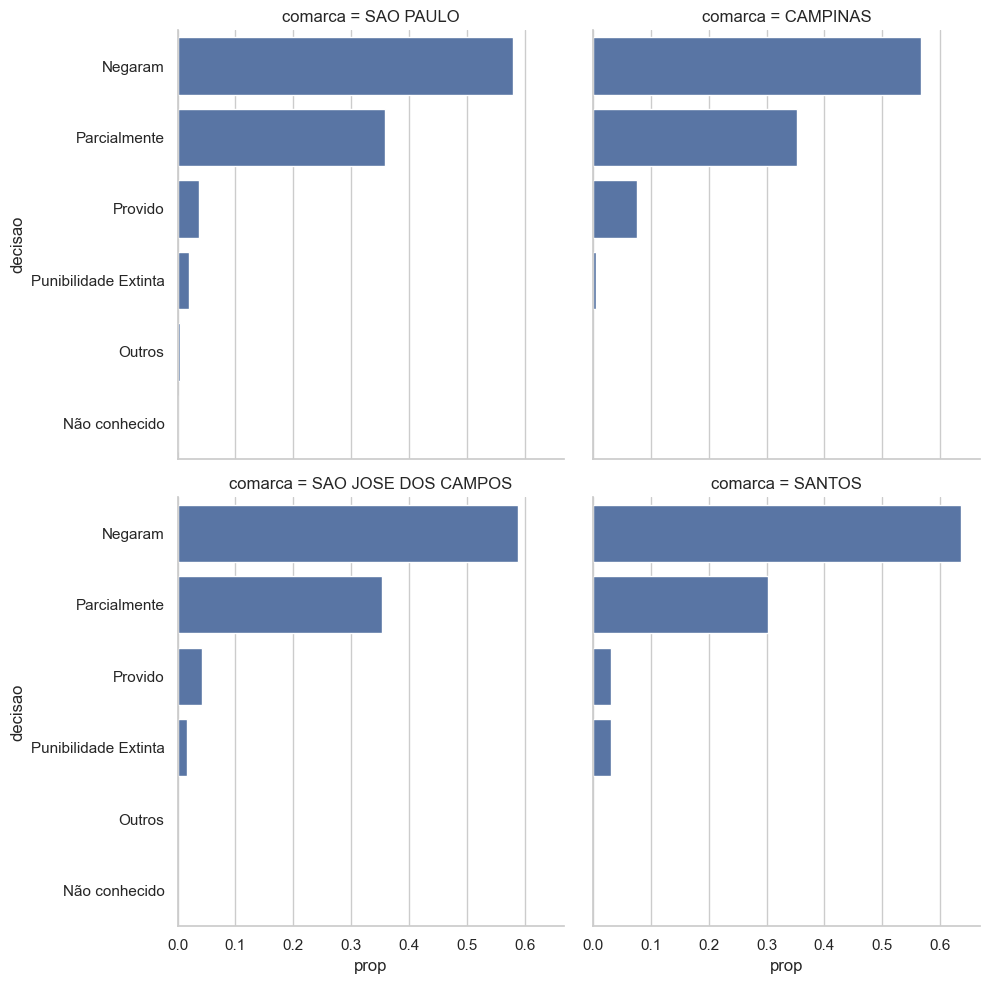

In [116]:
sns.catplot(data=ct_comarca, x='prop', y='decisao', kind='bar', col='comarca', col_wrap=2)

### Bivariada: explicativa numérica

Quando temos a variável de interesse categórica e a explicativa numérica, é um pouco difícil de criar visualizações, porque no fundo o que queremos entender é como o aumento/diminuição dessa variável numérica afeta a probabilidade de um evento relacionado à variável categórica acontecer. Isso geralmente é feito através de modelos estatísticos como a regressão logística, que veremos mais para frente na disciplina.

Algumas alternativas são: i) categorizar a variável numérica -- nesse caso, voltamos ao que já vimos anteriormente; ii) analisar a distribuição da variável numérica para cada categoria -- nesse caso, é como se estivéssemos invertendo qual é a variável de interesse e qual é a variável explicativa, logo isso faz parte da seção de variáveis numéricas, que veremos ainda nessa apostila, mas mais para frente.

## Visualização para variáveis numéricas

### Univariada

A análise univariada de uma variável de interesse numérica geralmente busca entender a distribuição dos dados.

Existem três principais visualizações aqui: histograma, densidade e boxplot. A densidade é simplesmente uma versão suavizada do histograma, e é possível mostrar os dois ao mesmo tempo.

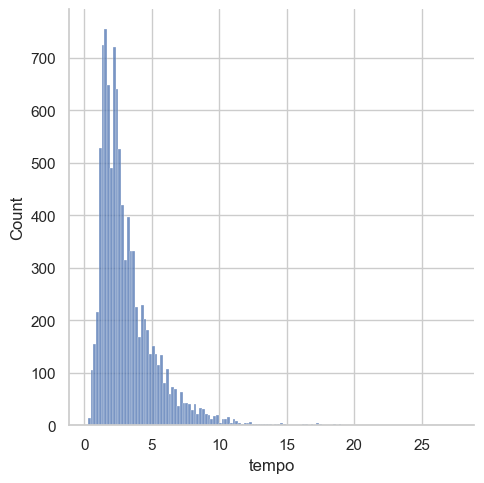

In [117]:
sns.displot(camaras, x='tempo')

Podemos mudar o número de barras com os parâmetros `bins` (quantidade de barras) ou `binwidth` (largura da barra).

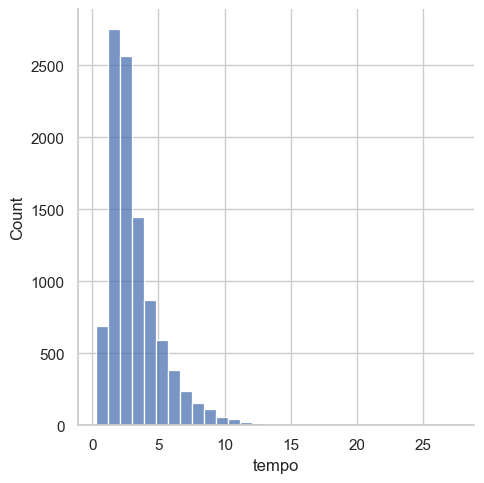

In [118]:
sns.displot(camaras, x='tempo', bins=30)

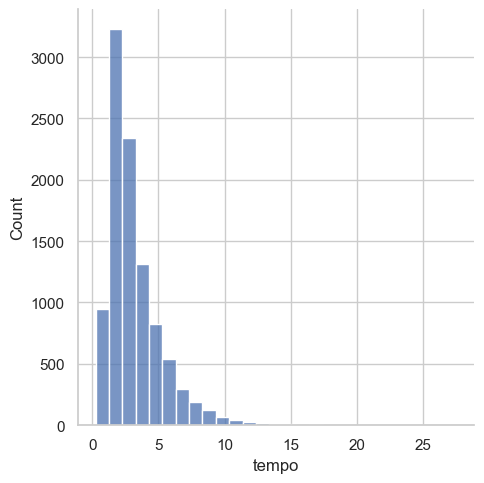

In [119]:
sns.displot(camaras, x='tempo', binwidth=1)

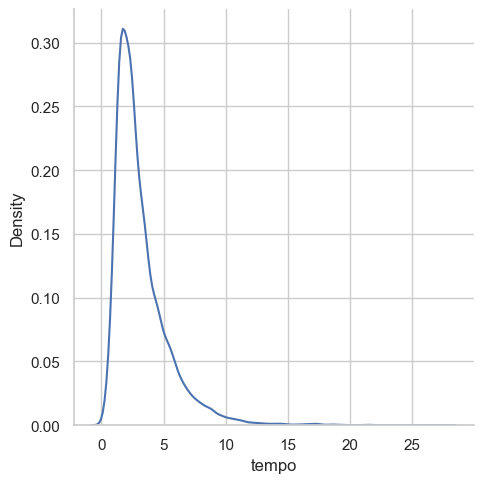

In [120]:
sns.displot(camaras, x='tempo', kind='kde')

Veja que, nesse caso, o eixo y representa a densidade, e não as contagens. A densidade tem relação com o conceito de distribuição de probabilidades. Na verdade, essa densidade é uma estimativa da função densidade de probabilidades da variável estudada (ou seja, é um modelo estatístico!). A área total do gráfico é 1.

Abaixo, juntamos histograma e densidade

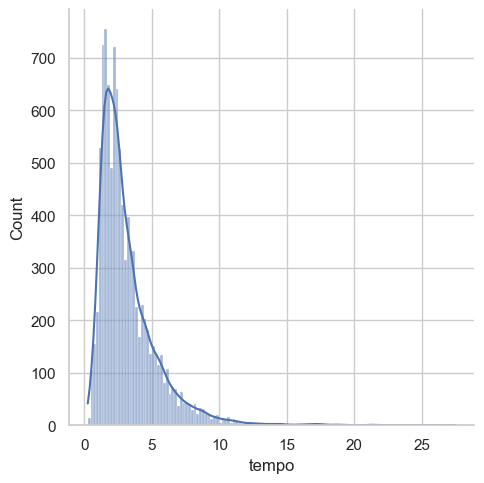

In [121]:
# com o gráfico de distribuição
sns.displot(camaras, x='tempo', kde=True)

Finalmente, temos o boxplot. O boxplot pode ser usado no caso univariado, mas é mais comum quando temos uma variável explicativa categórica.

<Axes: xlabel='tempo'>

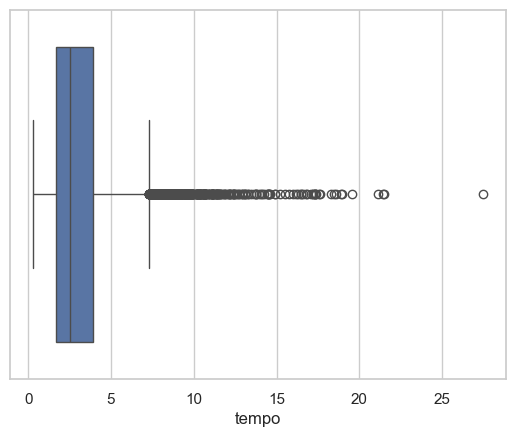

In [122]:
sns.boxplot(camaras, x='tempo')

### Bivariada: explicativa categórica

A ideia aqui é simplesmente repetir os gráficos acima para a variável categórica de interesse.

Começamos pelo histograma / densidade

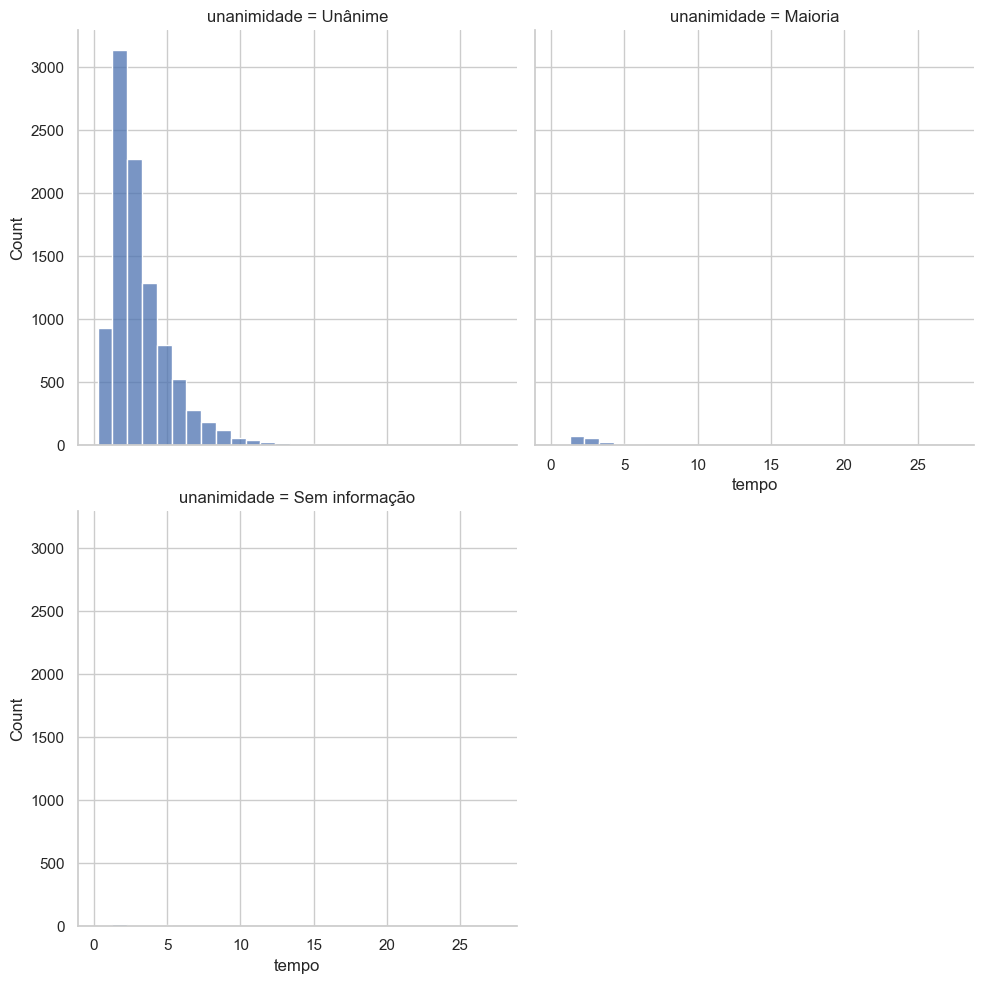

In [123]:
sns.displot(camaras, x='tempo', binwidth=1, col='unanimidade', col_wrap=2)

Note que aqui, a escala pode afetar o gráfico e dificultar a comparação.

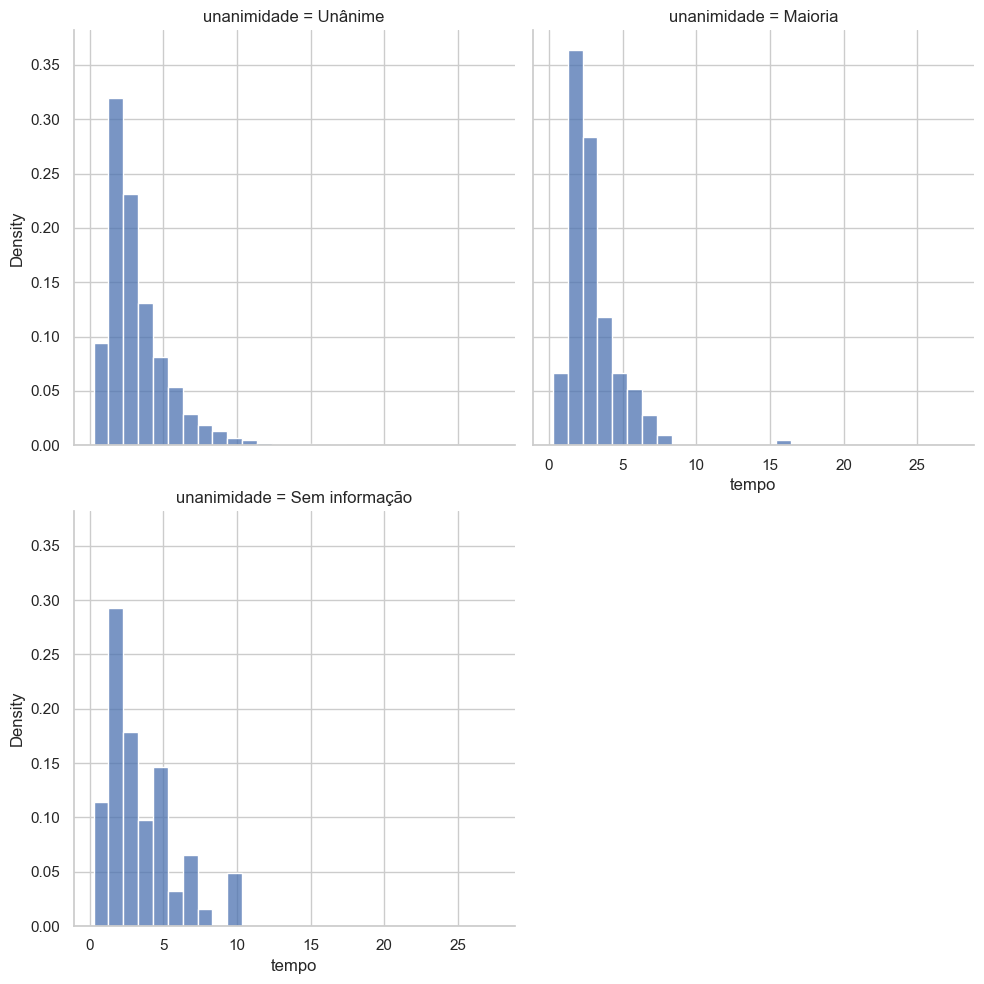

In [124]:
sns.displot(camaras, x='tempo', binwidth=1, col='unanimidade', stat='density', common_norm=False, col_wrap=2)

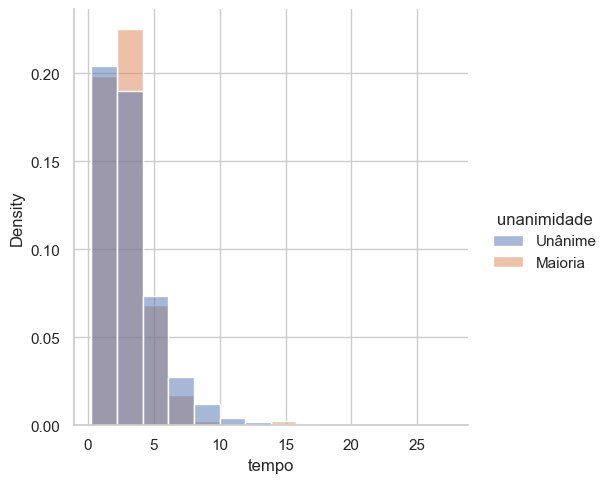

In [125]:
camaras_com_info = camaras[camaras.unanimidade != 'Sem informação']

sns.displot(camaras_com_info, x='tempo', binwidth=2, hue='unanimidade', stat='density', common_norm=False)

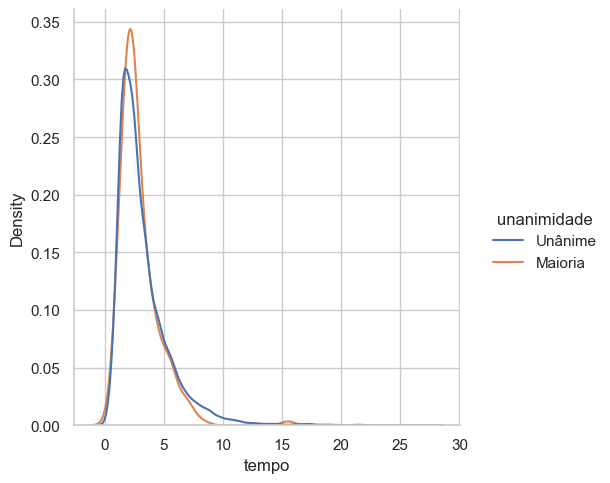

In [126]:
sns.displot(camaras_com_info, x='tempo', kind = 'kde', hue='unanimidade', common_norm=False)

E o boxplot:

<Axes: xlabel='tempo', ylabel='camara'>

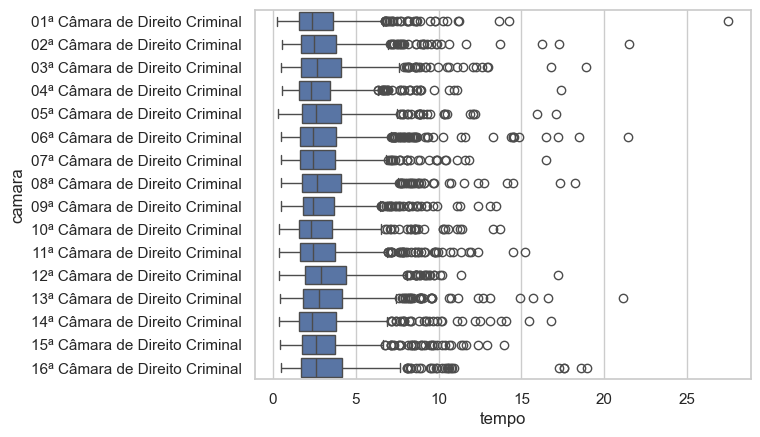

In [127]:
camaras_sem_extraord = camaras[~camaras['extraord']].sort_values('camara')
sns.boxplot(data=camaras_sem_extraord, x='tempo', y='camara')

<Axes: xlabel='tempo', ylabel='camara'>

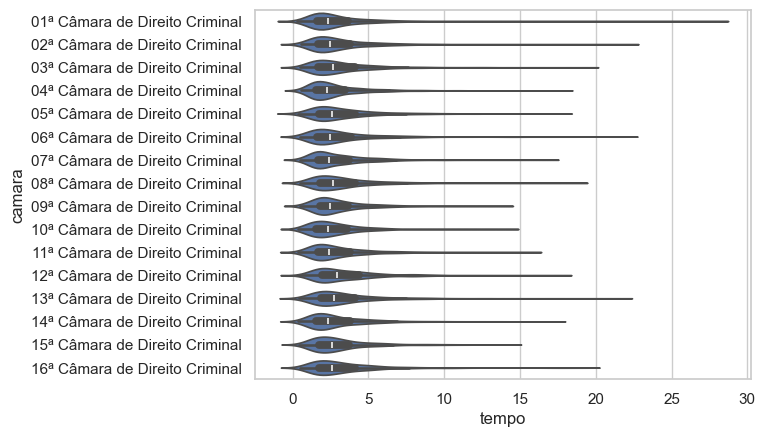

In [128]:
# alternativa ao boxplot: violinplot
# trata-se basicamente de um gráfico de densidade duplicado. Fica bonitinho.

camaras_sem_extraord = camaras[~camaras['extraord']].sort_values('camara')
sns.violinplot(data=camaras_sem_extraord, x='tempo', y='camara')

### Bivariada: explicativa numérica

Quando temos duas variáveis numéricas, usualmente fazemos um gráfico de dispersão. Nesse caso, usamos o `relplot()` do seaborn.

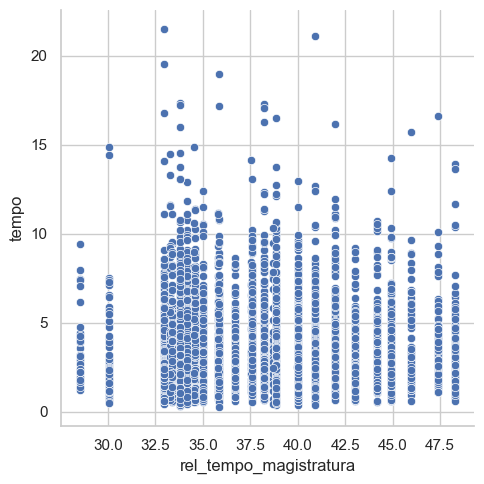

In [129]:
camaras

sns.relplot(camaras, x='rel_tempo_magistratura', y='tempo')

Podemos até adicionar mais variáveis aqui, como, por exemplo, nas cores

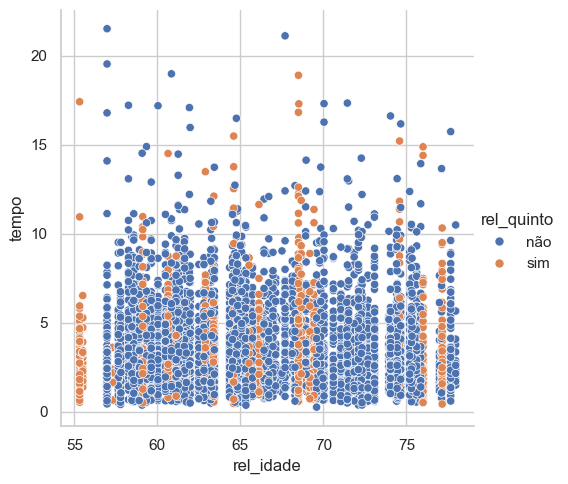

In [130]:
sns.relplot(camaras, x='rel_idade', y='tempo', hue='rel_quinto')

Um tipo especial de análise bivariada é quando o eixo x é uma data. Nesse caso, temos uma série de tempo, e representsaos os dados com um gráfico de linhas.

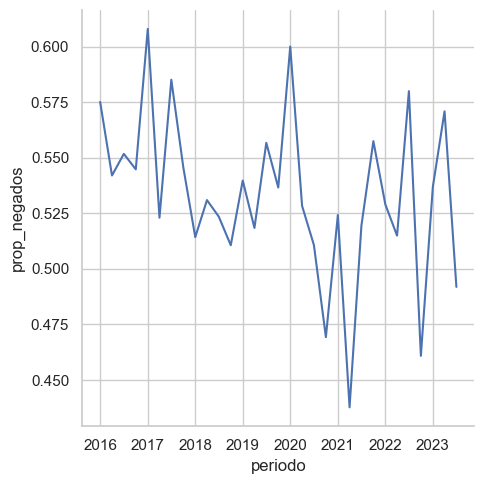

In [131]:
# vamos calcular a proporção de negados ao longo do tempo

# criando uma coluna que pega a data de publicação e arredonda o trimestre
# o pandas é bem burocrático para fazer essa tarefa simples
camaras['periodo'] = pd.to_datetime(camaras['dt_publicacao']).dt.to_period('Q').dt.to_timestamp()

prop_negados_mes = (
  camaras
  .query('polo_mp == "Passivo"')
  .groupby('periodo')
  .agg(prop_negados = ('decisao', lambda x: (x == 'Negaram').mean()))
  .reset_index()
)

prop_negados_mes

sns.relplot(prop_negados_mes, x='periodo', y='prop_negados', kind='line')

## Otimização

A otimização visual é um assunto extenso e muito baseado em tentativa e erro. Afinal, o que queremos aqui é adaptar nosso gráfico para um fim específico, e isso pode variar muito. **Nessas situações, o chatGPT e ferramentas similares podem ser muito úteis!**

Vamos colocar alguns exemplos de otimização aqui:

- Colocar o % nos eixos que são porcentagens
- Mudar o título dos eixos
- Mudar as cores das barras
- Mudar a cor de fundo


**Colocar o % nos eixos que são porcentagens**

Vamos voltar para o gráfico que vimos anteriormente

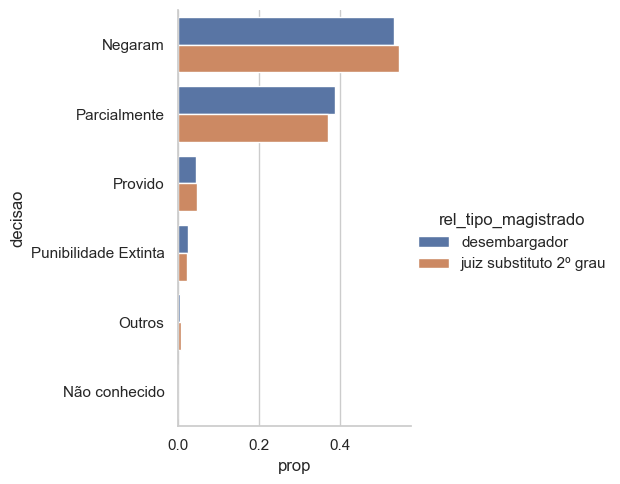

In [132]:
sns.catplot(ct_mag, x = 'prop', y = 'decisao', kind = 'bar', hue = 'rel_tipo_magistrado')

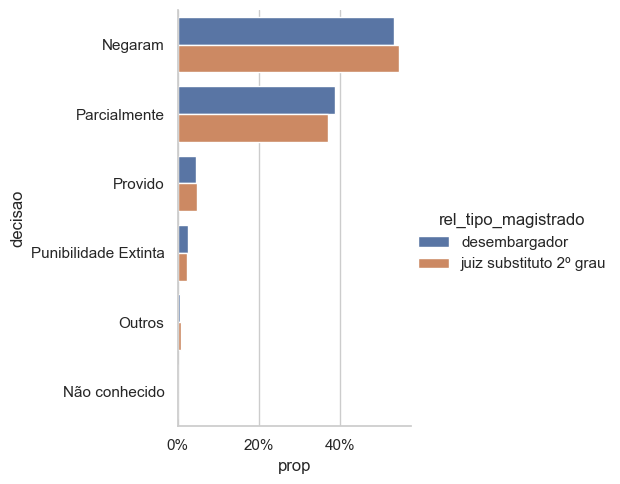

In [133]:
# função para formatar eixo x
def to_pct(x, pos):
  return f'{100*x:.0f}%'

sns.catplot(data=ct_mag, x='prop', y='decisao', kind='bar', hue='rel_tipo_magistrado')

# gca: get current axis
plt.gca().xaxis.set_major_formatter(to_pct)

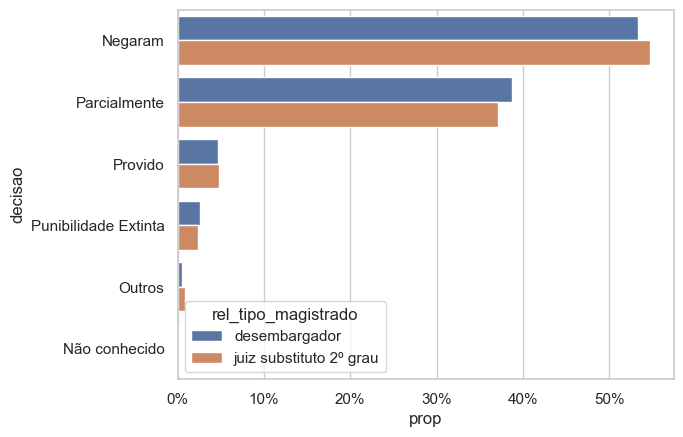

In [134]:
# Outro jeito, usando um pouco mais de matplotlib. Não dá para usar catplot

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax=ax)

ax.xaxis.set_major_formatter(plt.FuncFormatter(to_pct))

Veja que precisamos voltar a usar uma função mais 'baixo nível', a barplot

**Mudar o título dos eixos**

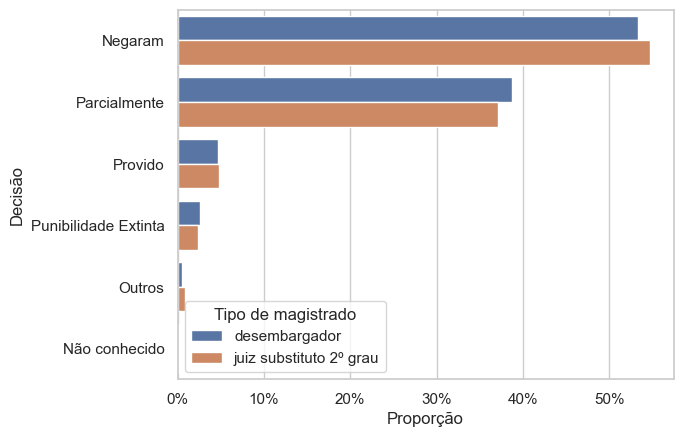

In [135]:
fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax)

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

**Cores**

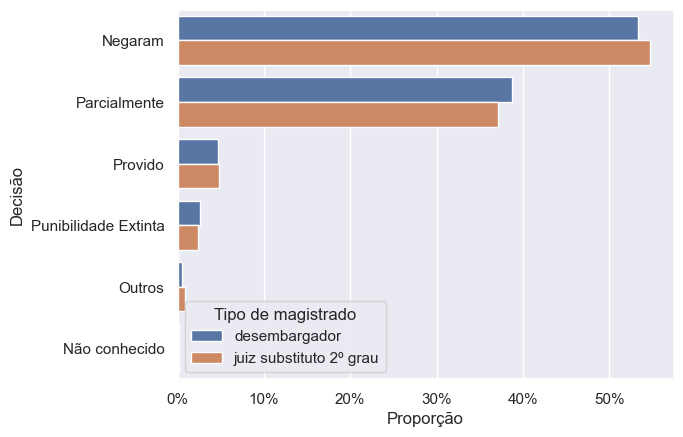

In [136]:
sns.set_theme()

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax)

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

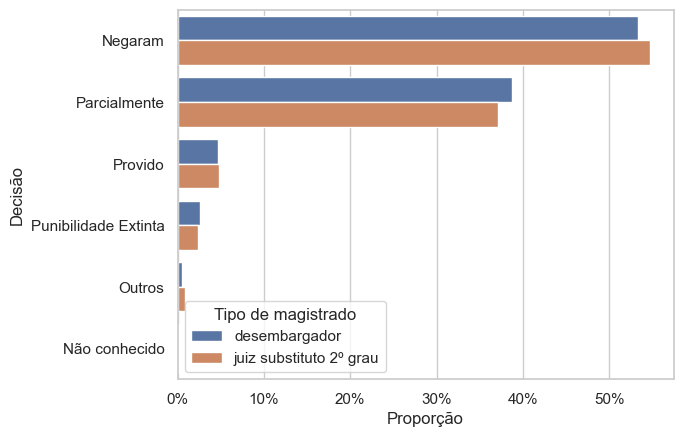

In [137]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax)

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

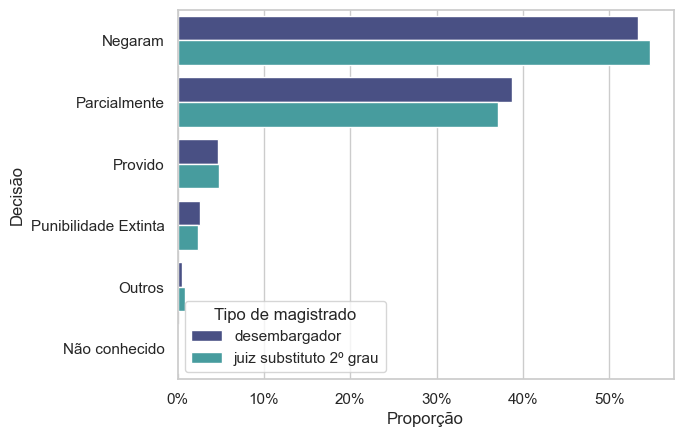

In [138]:
sns.set_context('notebook')

# palette options: https://seaborn.pydata.org/tutorial/color_palettes.html
# minhas favoritas: 'rocket', 'mako', 'viridis'

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax, palette='mako')

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

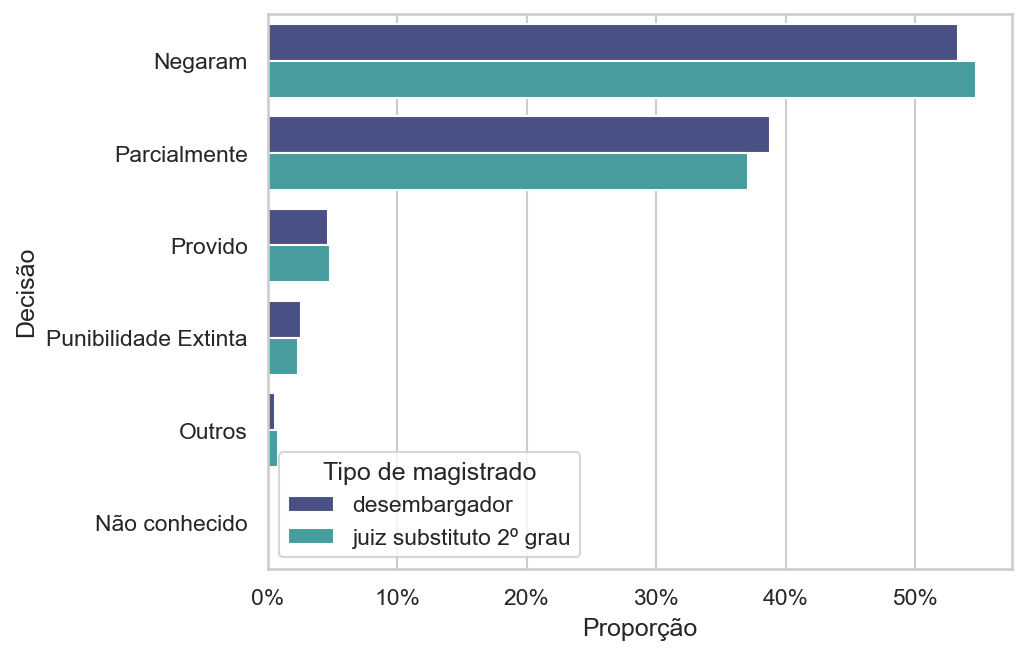

In [139]:
# Aumentar a resolução mudando dpi (dots per inch)
# obs: afeta todo o documento!

plt.rcParams.update({"figure.dpi": 150})

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax, palette='mako')

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

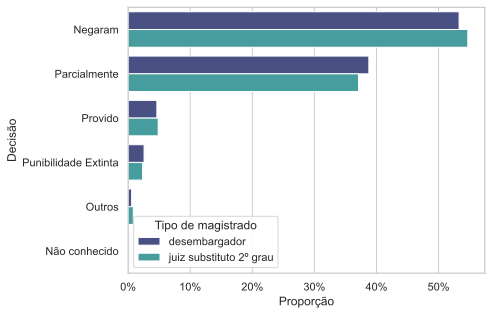

In [140]:
# também é possível mudar a configuração do jupyter

%config InlineBackend.figure_format = "svg"

# mais informações: https://seaborn.pydata.org/faq.html#why-do-the-plots-look-fuzzy-in-a-jupyter-notebook

fig, ax = plt.subplots()
sns.barplot(data=ct_mag, x='prop', y='decisao', hue='rel_tipo_magistrado', ax = ax, palette='mako')

ax.xaxis.set_major_formatter(to_pct)
ax.set_xlabel('Proporção')
ax.set_ylabel('Decisão')
ax.legend(title = 'Tipo de magistrado')

plt.show()

In [141]:
# Vamos voltar ao 'normal'

%config InlineBackend.figure_format = "png"
plt.rcParams.update({"figure.dpi": 100})